#### Librerías

In [129]:
%matplotlib inline

# importar librerías estándar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# semilla para garantizar la reproducibildiad del código
seed = 923

#### Importar datos

In [130]:
# leer el conjunto de datos a utilizar
data = pd.read_csv(r'Employee_Attrition_datos_reto_binario-1.csv')

#### Análisis exploratorio de datos

In [131]:
data.shape

(7000, 24)

In [132]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,6588.0,39.622799,13.606920,19.0000,27.0000,37.0000,52.0000,65.0000
Education_Level,7000.0,3.187857,1.065102,1.0000,3.0000,3.0000,4.0000,5.0000
Time_of_service,6856.0,13.385064,10.364188,0.0000,5.0000,10.0000,21.0000,43.0000
Time_since_promotion,7000.0,2.367143,1.149395,0.0000,1.0000,2.0000,3.0000,4.0000
growth_rate,7000.0,47.064286,15.761406,20.0000,33.0000,47.0000,61.0000,74.0000
Travel_Rate,7000.0,0.817857,0.648205,0.0000,0.0000,1.0000,1.0000,2.0000
Post_Level,7000.0,2.798000,1.163721,1.0000,2.0000,3.0000,3.0000,5.0000
Pay_Scale,6991.0,6.006294,2.058435,1.0000,5.0000,6.0000,8.0000,10.0000
Work_Life_balance,6989.0,2.387895,1.122786,1.0000,1.0000,2.0000,3.0000,5.0000
VAR1,7000.0,3.098571,0.836377,1.0000,3.0000,3.0000,3.0000,5.0000


In [133]:
# Cualitativas
data.describe(include=[object]).T

,count,unique,top,freq
Employee_ID,7000,7000,EID_23371,1
Gender,7000,2,F,4114
Relationship_Status,7000,2,Married,4520
Hometown,7000,5,Lebanon,2070
Unit,7000,12,IT,1394
Decision_skill_possess,7000,4,Conceptual,1756
Compensation_and_Benefits,7000,5,type2,3945


In [134]:
# Información sobre los datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                7000 non-null   object 
 1   Gender                     7000 non-null   object 
 2   Age                        6588 non-null   float64
 3   Education_Level            7000 non-null   int64  
 4   Relationship_Status        7000 non-null   object 
 5   Hometown                   7000 non-null   object 
 6   Unit                       7000 non-null   object 
 7   Decision_skill_possess     7000 non-null   object 
 8   Time_of_service            6856 non-null   float64
 9   Time_since_promotion       7000 non-null   int64  
 10  growth_rate                7000 non-null   int64  
 11  Travel_Rate                7000 non-null   int64  
 12  Post_Level                 7000 non-null   int64  
 13  Pay_Scale                  6991 non-null   float

In [135]:
data.isnull().sum()

Employee_ID                    0
Gender                         0
Age                          412
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              144
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance             11
VAR1                           0
VAR2                         577
VAR3                           0
VAR4                         656
VAR5                           0
VAR6                           0
VAR7                           0
Attrition_label                0
dtype: int64

In [136]:
# sustituye datos faltantes de tiempo de servicio con la mediana
data['Time_of_service'].fillna(10, inplace=True)
# sustituye datos faltantes de Work_Life_balance con la mediana
data['Work_Life_balance'].fillna(2, inplace=True)
# sustituye datos faltantes de edad con la mediana
data['Age'].fillna(37, inplace=True)
# sustituye datos faltantes de Pay_Scale con la mediana.
data['Pay_Scale'].fillna(6, inplace=True)
data.isnull().sum()


Employee_ID                    0
Gender                         0
Age                            0
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service                0
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      0
Compensation_and_Benefits      0
Work_Life_balance              0
VAR1                           0
VAR2                         577
VAR3                           0
VAR4                         656
VAR5                           0
VAR6                           0
VAR7                           0
Attrition_label                0
dtype: int64

In [137]:
# elimina columnas Id del pasajero, Nombre, Boleto y Cabina
df = data.drop(columns=['Employee_ID','VAR1','VAR1','VAR2','VAR3','VAR4','VAR5','VAR6','VAR7'])

# mostrar la información condensada del nuevo dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Gender                     7000 non-null   object 
 1   Age                        7000 non-null   float64
 2   Education_Level            7000 non-null   int64  
 3   Relationship_Status        7000 non-null   object 
 4   Hometown                   7000 non-null   object 
 5   Unit                       7000 non-null   object 
 6   Decision_skill_possess     7000 non-null   object 
 7   Time_of_service            7000 non-null   float64
 8   Time_since_promotion       7000 non-null   int64  
 9   growth_rate                7000 non-null   int64  
 10  Travel_Rate                7000 non-null   int64  
 11  Post_Level                 7000 non-null   int64  
 12  Pay_Scale                  7000 non-null   float64
 13  Compensation_and_Benefits  7000 non-null   objec

#### Balance

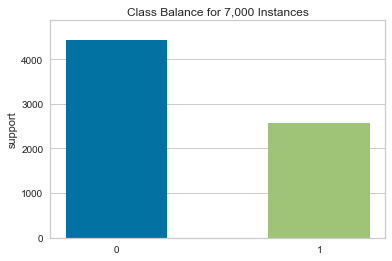

In [138]:
from yellowbrick.target import ClassBalance
class_visualizer = ClassBalance(
	labels=[0, 1]			# Indicamos las etiquetas de las clases. 
									# Ten cuidado con el orden de las etiquetas.
)
class_visualizer.fit(df.Attrition_label)
class_visualizer.show(outpath="");

In [139]:
(
    pd.concat([df.assign(set = 'Deserción')], axis = 0)
        .loc[:,['set', 'Attrition_label']]
        .groupby(['set','Attrition_label'])
        .size()
        .reset_index()
        .rename(columns = {0:'conteos', 'Attrition_label':'target'})
        .pivot(index='set', columns='target', values='conteos', )
)

target,0,1
set,,
Deserción,4427,2573


#### Procesmiento de datos

In [140]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(
    df,							# Pasamos el conjunto de entrenamiento 
    test_size = 0.20,		# Indicamos la cantidad de observaciones que
    									# queremos en nuestro conjunto de validación.
    									# Observa que lo estamos haciendo en función
    									# del tamaño del conjunto de prueba, para 
    									# facilmente garantizar que saquemos otro
    									# 10% de los datos totales.
    stratify=df.Attrition_label,				# Indica la variable por la que vamos a estratificar.
    random_state=50						# Proporcionamos una semilla para garantizar
    									# la reproducibilidad.
)

In [141]:
train_set.shape, test_set.shape

((5600, 16), (1400, 16))

In [142]:
train_set.Attrition_label.value_counts(normalize=True)[0],test_set.Attrition_label.value_counts(normalize=True)[0]

(0.6325, 0.6321428571428571)

In [143]:
df_num = df.select_dtypes(include="float").columns.to_list()

In [144]:
def fun_preprocess_numeric_variables(df2):
    '''Regresa un data frame con las variables numéricas preprocesadas.
    
    Seleccionar el resto de las varaibles numéricas.
    
    Parameters
    ----------
    df2: DataFrame
        DataFrame con los datos de los empleados.
        
    Returns
    -------
    DataFrame
        DataFrame con los campos numéricos preprocesados . 
    '''
    									
    return df2[df_num]
    

def fun_preprocess_categorical_variables(df2):
    '''Regresar un data frame con las variables categóricas preprocesadas.

    Convierte en dummies las variables categóricas (Gender, Relationship_Status, Hometown, 
    y Compensation_and_Benefits). 
    En algunos casos recodifica algunas categorías con replace.
    Para una variable categórica se elimina la primera opción con drop_first
    esto es para evitar problemas de multicolinealidad en algunos algorítmos.
    
    Parameters
    ----------
    df2: DataFrame
        DataFrame con los datos de los empleados.
        
    Returns
    -------
    DataFrame
        DataFrame con los campos categóricos preprocesados.  
    '''
    					
    df_gral = pd.get_dummies(df2[['Hometown', 'Unit', 'Decision_skill_possess', 'Compensation_and_Benefits']])
    df_Gender = pd.get_dummies(df2[['Gender']], drop_first = True)
    df_Relationship_Status = pd.get_dummies(df2[['Relationship_Status']], drop_first = True)
   
    return pd.concat([df_gral, df_Gender, df_Relationship_Status], axis = 1)

def fun_preprocesar_atributos(df2):
    '''Regresa un DataFrame con los datos categóricos preprocesados
    
    Parameters
    ----------
    df2: DataFrame
        DataFrame con los empleados.
        
    Returns
    -------
    DataFrame
        DataFrame con los datos preprocesados
    '''
    df_numeric = fun_preprocess_numeric_variables(df2)
    df_categorical = fun_preprocess_categorical_variables(df2)
    
    return pd.concat([df_numeric, df_categorical], axis = 1)

def fun_identificar_categoria(df2):

    return df2[['Attrition_label']]

In [145]:
assert fun_preprocesar_atributos(train_set).columns.tolist() == fun_preprocesar_atributos(train_set).columns.tolist()
assert fun_preprocesar_atributos(test_set).columns.tolist() == fun_preprocesar_atributos(test_set).columns.tolist()

In [146]:
# Antes
train_set.shape, test_set.shape

((5600, 16), (1400, 16))

In [147]:
# Después
fun_preprocesar_atributos(train_set).shape, fun_preprocesar_atributos(test_set).shape

((5600, 32), (1400, 32))

In [148]:
X_train = fun_preprocesar_atributos(train_set)
y_train = fun_identificar_categoria(train_set)

X_test = fun_preprocesar_atributos(test_set)
y_test = fun_identificar_categoria(test_set)

In [149]:
from sklearn.model_selection import train_test_split

variable_selection = X_test.columns.to_list()

X_test, X_val,y_test,y_val = train_test_split(
    X_test[variable_selection],y_test,
    test_size=0.5, random_state=1
)


In [150]:
X_train.shape,X_val.shape,X_test.shape

((5600, 32), (700, 32), (700, 32))

In [151]:
from sklearn.tree import DecisionTreeClassifier
# Especificamos un modelo de árbol de decisión
clf_dt = DecisionTreeClassifier(
    max_depth = 2, 
    class_weight = 'balanced', 	# Indicamos que se deben reponderar las clases.
    random_state=seed			# Indicamos una semilla para reproducibilidad.
)
# Ajustamos el modelo y predecimos
clf_dt.fit(X_train, y_train)
y_pred = clf_dt.predict(X_val)

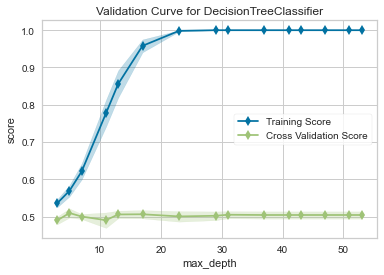

In [153]:
from yellowbrick.model_selection import ValidationCurve

# Especificamos un modelo de árbol de decisión
clf_dt = DecisionTreeClassifier(
    max_depth = 4, 
    class_weight = 'balanced', 	# Indicamos que se deben reponderar las clases.
    random_state=seed			# Indicamos una semilla para reproducibilidad.
)

# Especificamos la curva de validación
viz = ValidationCurve(
    clf_dt, 							# Especificar el modelo (debe ser un estiamdor)
    param_name="max_depth",				# Especificar un solo hiperparámetro a evaluar
    param_range=[3, 5, 7, 11, 13, 17, 	# Dara una lista o numpy.array con los valores probar
    			23, 29, 31, 37, 41, 
    			43, 47, 51, 53], 
    cv=5, 								# Indicar el valor k, para construir la validación cruzada
    scoring="roc_auc",					# Indicar la métrica de evaluación para el modelo.
    n_jobs=-1							# Indicar cuántos CPUs utilizar para paralelizar el trabajo.
    									# n_jobs=-1, signfica utilizar todos los CPUs disponibles.
)
# Ajustamos el modelo y la visualización
viz.fit(X_train, y_train)
# Imprimimos en la pantalla la visualización.
viz.show(outpath="04_curva_validacion_max_depth.png");

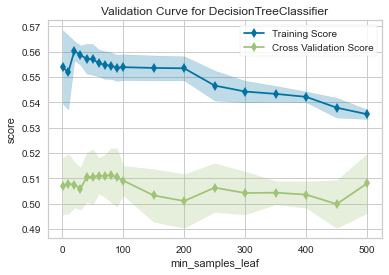

In [155]:
viz = ValidationCurve(
    clf_dt, 							
    param_name="min_samples_leaf",		# Probamos con un nuevo hiperparámetro 
    param_range=[1, 10, 20, 30, 40,		# Especificamos una lista con los nuevos
    			50, 60, 70, 80, 90,		# valores. 
    			100, 150, 200, 250, 
    			300, 350, 400, 450, 
    			500], 
    cv=5, 
    scoring="roc_auc",
    n_jobs=-1
)
# Ajustamos el modelo y la visualización
viz.fit(X_train, y_train)
# Imprimimos en la pantalla la visualización.
viz.show(outpath="05_curva_validacion_min_samples_leaf.png");